# POS calculation

- Input data: POS_dataframe_checked.csv
- [total_word]: Calculate the “total_word” of each cleaned_text
- [duration]: Calculate the duration of the sentence
- [num_POS]: Calculate the numbers of POS with my cleaned data
- Calculate the correct rate of spacy’s POS with mine
    - POS: num_nouns, num_verbs, num_adjectives, num_pronouns
    - Mine: nouns_corrected, verbs_corrected, adjectives_corrected, pronouns_corrected
- Calculate the proportion of POS
    - [POS_prop_word]: nums of POS/ total numbers of words in each sentence
    - [POS_prop_sec]: nums of POS/ duration of the sentence
- Filter out the useless columns
    - Onset, offset, nouns, verbs, adjectives, pronouns, num_nouns, num_verbs, num_adjectives, num_pronouns, nouns_corrected, verbs_corrected, adjectives_corrected, pronouns_corrected
- save output


- find the top 20 words of each POS
    - overall
    - find these overall 20 to see the frequency occur in each
        - task
        - condition
        - task + condition


In [1]:
import pandas as pd
import re

In [2]:
# 1. Load the CSV files into the script
df = pd.read_csv(r'D:\UoA/04research\01PhD_projects\03_POS\data\POS_dataframe_checked_2.csv')


# output path
output_path = "D:/UoA/04research/01PhD_projects/03_POS/output/POS_dataframe_calculation_2.csv"

In [3]:
# 2. Create a "duration" column by calculating the difference between "offset" and "onset"
df['duration'] = df['offset'] - df['onset']

In [4]:
# 3. Create a "total_word" column by calculating the total number of words in the "text_cleaned" column, excluding punctuation
def count_words(text):
    if not isinstance(text, str):  # Check if the input is a string
        return 0
    text_no_punct = re.sub(r'[^\w\s]', '', text)  # Remove punctuation marks
    return len(text_no_punct.split())

df['total_word'] = df['text_cleaned'].apply(count_words)

In [5]:
# 4. Create columns to calculate the number of words in the columns [nouns_corrected], [verbs_corrected], [adjectives_corrected], and [pronouns_corrected]
columns_to_process = ['nouns_corrected', 'verbs_corrected', 'adjectives_corrected', 'pronouns_corrected']

for column in columns_to_process:
    new_column = f"{column}_count"
    df[new_column] = df[column].apply(count_words)

In [6]:
# Check the resulting DataFrame
df.head(10)

,StudyID,condition,task,Task_name,interactoin_order,onset,offset,text_cleaned,duration,nouns,...,pronouns_corrected,nouns_replace,verbs_replace,adjectives_replace,pronouns_replace,total_word,nouns_corrected_count,verbs_corrected_count,adjectives_corrected_count,pronouns_corrected_count
0,DIME001,CV,Blicket,Blicket_CV,2,1.991854,2.584891,right .,0.593037,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
1,DIME001,CV,Blicket,Blicket_CV,2,3.303724,5.064866,"[ childname ] , do you know what this is ?",1.761141,NaN,...,you this,NaN,know,NaN,you this,7,0,1,0,2
2,DIME001,CV,Blicket,Blicket_CV,2,6.320661,6.877757,[ childname ] ?,0.557096,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
3,DIME001,CV,Blicket,Blicket_CV,2,8.823074,11.410873,"[ childname ] , do you know what this is ?",2.587799,NaN,...,you this,NaN,know,NaN,you this,7,0,1,0,2
4,DIME001,CV,Blicket,Blicket_CV,2,11.446815,12.471152,"look , look here .",1.024337,NaN,...,NaN,NaN,look look,NaN,NaN,3,0,2,0,0
5,DIME001,CV,Blicket,Blicket_CV,2,12.932788,15.646383,"[ childname ] , look at this sweetheart .",2.713595,sweetheart,...,NaN,childname sweetheart,look,NaN,NaN,5,2,1,0,0
6,DIME001,CV,Blicket,Blicket_CV,2,16.261864,17.681559,this is call a blicket .,1.419695,blicket,...,this,target_object,be call,NaN,this,5,1,2,0,1
7,DIME001,CV,Blicket,Blicket_CV,2,19.298934,20.431096,can you say blicket ?,1.132162,blicket,...,you,target_object,say,NaN,you,4,1,1,0,1
8,DIME001,CV,Blicket,Blicket_CV,2,27.314854,28.321220,look .,1.006366,NaN,...,NaN,NaN,look,NaN,NaN,1,0,1,0,0
9,DIME001,CV,Blicket,Blicket_CV,2,28.536870,29.291645,a blicket .,0.754775,blicket,...,NaN,target_object,NaN,NaN,NaN,2,1,0,0,0


## Calculate the correct rate of spacy’s POS with mine

In [25]:
import statistics

In [26]:
# Sum the values in each column
sum_num_nouns = df['num_nouns'].sum()
sum_num_verbs = df['num_verbs'].sum()
sum_num_adjectives = df['num_adjectives'].sum()
sum_num_pronouns = df['num_pronouns'].sum()

# Print the results
print(f"Sum of num_nouns: {sum_num_nouns}")
print(f"Sum of num_verbs: {sum_num_verbs}")
print(f"Sum of num_adjectives: {sum_num_adjectives}")
print(f"Sum of num_pronouns: {sum_num_pronouns}")

Sum of num_nouns: 4852
Sum of num_verbs: 5450
Sum of num_adjectives: 821
Sum of num_pronouns: 5597


In [27]:
# Sum the values in each column
sum_num_nouns_corrected = df['nouns_corrected_count'].sum()
sum_num_verbs_corrected = df['verbs_corrected_count'].sum()
sum_num_adjectives_corrected = df['adjectives_corrected_count'].sum()
sum_num_pronouns_corrected = df['pronouns_corrected_count'].sum()

# Print the results
print(f"Sum of nouns_corrected: {sum_num_nouns_corrected}")
print(f"Sum of verbs_corrected: {sum_num_verbs_corrected}")
print(f"Sum of adjectives_corrected: {sum_num_adjectives_corrected}")
print(f"Sum of pronouns_corrected: {sum_num_pronouns_corrected}")

Sum of nouns_corrected: 4722
Sum of verbs_corrected: 6870
Sum of adjectives_corrected: 824
Sum of pronouns_corrected: 5289


In [28]:
# percent correctness

nouns_correct = sum_num_nouns/sum_num_nouns_corrected*100
verbs_correct = sum_num_verbs/sum_num_verbs_corrected*100
adjectives_correct = sum_num_adjectives/sum_num_adjectives_corrected*100
pronouns_correct = sum_num_pronouns/sum_num_pronouns_corrected*100

print(f"noun correctness: {nouns_correct}")
print(f"verb correctness: {verbs_correct}")
print(f"adj correctness: {adjectives_correct}")
print(f"pronoun correctness: {pronouns_correct}")

noun correctness: 102.75307073274035
verb correctness: 79.33042212518195
adj correctness: 99.63592233009709
pronoun correctness: 105.82340707128002


In [29]:
# Calculate the mean correctness
mean_correct = statistics.mean([nouns_correct, verbs_correct, adjectives_correct, pronouns_correct])
print(f"Mean correctness: {mean_correct}")

Mean correctness: 96.88570556482486


## percentage correctness for PCA

In [7]:
# Columns to remove
columns_to_remove = [
    "onset", "offset", "nouns", "verbs", "adjectives", "pronouns",
    "num_nouns", "num_verbs", "num_adjectives", "num_pronouns",
    "nouns_corrected", "verbs_corrected", "adjectives_corrected", "pronouns_corrected"
]

# Remove the specified columns
df_filtered = df.drop(columns=columns_to_remove)


In [8]:
# Display the filtered DataFrame
df_filtered.head(10)

,StudyID,condition,task,Task_name,interactoin_order,text_cleaned,duration,nouns_replace,verbs_replace,adjectives_replace,pronouns_replace,total_word,nouns_corrected_count,verbs_corrected_count,adjectives_corrected_count,pronouns_corrected_count
0,DIME001,CV,Blicket,Blicket_CV,2,right .,0.593037,NaN,NaN,NaN,NaN,1,0,0,0,0
1,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",1.761141,NaN,know,NaN,you this,7,0,1,0,2
2,DIME001,CV,Blicket,Blicket_CV,2,[ childname ] ?,0.557096,NaN,NaN,NaN,NaN,1,0,0,0,0
3,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",2.587799,NaN,know,NaN,you this,7,0,1,0,2
4,DIME001,CV,Blicket,Blicket_CV,2,"look , look here .",1.024337,NaN,look look,NaN,NaN,3,0,2,0,0
5,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , look at this sweetheart .",2.713595,childname sweetheart,look,NaN,NaN,5,2,1,0,0
6,DIME001,CV,Blicket,Blicket_CV,2,this is call a blicket .,1.419695,target_object,be call,NaN,this,5,1,2,0,1
7,DIME001,CV,Blicket,Blicket_CV,2,can you say blicket ?,1.132162,target_object,say,NaN,you,4,1,1,0,1
8,DIME001,CV,Blicket,Blicket_CV,2,look .,1.006366,NaN,look,NaN,NaN,1,0,1,0,0
9,DIME001,CV,Blicket,Blicket_CV,2,a blicket .,0.754775,target_object,NaN,NaN,NaN,2,1,0,0,0


In [9]:
# 1. Create "POS_prop_word" column
df_filtered['nouns_prop_word'] = (df_filtered['nouns_corrected_count'] / df_filtered['total_word']) * 100
df_filtered['verbs_prop_word'] = (df_filtered['verbs_corrected_count'] / df_filtered['total_word']) * 100
df_filtered['adjs_prop_word'] = (df_filtered['adjectives_corrected_count'] / df_filtered['total_word']) * 100
df_filtered['pronouns_prop_word'] = (df_filtered['pronouns_corrected_count'] / df_filtered['total_word']) * 100

# 2. Create "POS_prop_second" column
df_filtered['nouns_prop_second'] = df_filtered['nouns_corrected_count'] / df_filtered['duration']
df_filtered['verbs_prop_second'] = df_filtered['verbs_corrected_count'] / df_filtered['duration']
df_filtered['adjs_prop_second'] = df_filtered['adjectives_corrected_count'] / df_filtered['duration']
df_filtered['pronouns_prop_second'] = df_filtered['pronouns_corrected_count'] / df_filtered['duration']

# Display the updated DataFrame
df_filtered.head()


,StudyID,condition,task,Task_name,interactoin_order,text_cleaned,duration,nouns_replace,verbs_replace,adjectives_replace,...,adjectives_corrected_count,pronouns_corrected_count,nouns_prop_word,verbs_prop_word,adjs_prop_word,pronouns_prop_word,nouns_prop_second,verbs_prop_second,adjs_prop_second,pronouns_prop_second
0,DIME001,CV,Blicket,Blicket_CV,2,right .,0.593037,NaN,NaN,NaN,...,0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",1.761141,NaN,know,NaN,...,0,2,0.0,14.285714,0.0,28.571429,0.0,0.567814,0.0,1.135627
2,DIME001,CV,Blicket,Blicket_CV,2,[ childname ] ?,0.557096,NaN,NaN,NaN,...,0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,DIME001,CV,Blicket,Blicket_CV,2,"[ childname ] , do you know what this is ?",2.587799,NaN,know,NaN,...,0,2,0.0,14.285714,0.0,28.571429,0.0,0.386429,0.0,0.772857
4,DIME001,CV,Blicket,Blicket_CV,2,"look , look here .",1.024337,NaN,look look,NaN,...,0,0,0.0,66.666667,0.0,0.000000,0.0,1.952482,0.0,0.000000


In [33]:
df_filtered.to_csv(output_path, index=False)

- use this csv for PCA analysis
- use this csv for plotting the percentage/proportion of POS across tasks/condition

## Find top 20 words

## count only the POS that appear in all of the tasks and conditions

1. nouns

In [10]:
from collections import Counter

# 1. Create a dictionary with an empty set for each task
tasks = ["Blicket_CV", "Blicket_DG", "BlocksA_CV", "BlocksA_DG", "BlocksB_CV", "BlocksB_DG"]
task_nouns = {task: set() for task in tasks}

# 2. Loop through all the rows in the dataframe, split the nouns and add them to the corresponding task set
for index, row in df_filtered.iterrows():
    task_name = row['Task_name']
    nouns = row['nouns_replace']
    
    if isinstance(nouns, str):
        task_nouns[task_name].update(nouns.split())

# 3. Find the intersection of nouns that appear in all tasks
common_nouns = set.intersection(*task_nouns.values())

# 4. Create a counter with only the common nouns
all_nouns = []
for nouns in df_filtered['nouns_replace']:
    if isinstance(nouns, str):
        all_nouns.extend(nouns.split())

common_nouns_counter = Counter({noun: count for noun, count in Counter(all_nouns).items() if noun in common_nouns})

# 5. Find the top 20 frequent common nouns and their frequencies
top_20_common_nouns = common_nouns_counter.most_common(20)

# Print the top 20 frequent common nouns and their frequencies
print("Top 20 frequent nouns that appear in all tasks and their frequencies:")
for noun, frequency in top_20_common_nouns:
    print(f"{noun}: {frequency}")


Top 20 frequent nouns that appear in all tasks and their frequencies:
target_object: 2131
childname: 448
parent: 194
sweetheart: 147
finger: 137
screen_device: 119
infant_gender: 119
turn: 89
job: 32
hand: 21
colour: 20
bit: 17
move: 16


2. verb

In [11]:
# 1. Create a dictionary with an empty set for each task
task_verbs = {task: set() for task in tasks}

# 2. Loop through all the rows in the dataframe, split the nouns and add them to the corresponding task set
for index, row in df_filtered.iterrows():
    task_name = row['Task_name']
    verbs = row['verbs_replace']
    
    if isinstance(verbs, str):
        task_verbs[task_name].update(verbs.split())

# 3. Find the intersection of nouns that appear in all tasks
common_verbs = set.intersection(*task_verbs.values())

# 4. Create a counter with only the common nouns
all_verbs = []
for verbs in df_filtered['verbs_replace']:
    if isinstance(verbs, str):
        all_verbs.extend(verbs.split())

common_verbs_counter = Counter({verb: count for verb, count in Counter(all_verbs).items() if verb in common_verbs})

# 5. Find the top 20 frequent common nouns and their frequencies
top_20_common_verbs = common_verbs_counter.most_common(20)

# Print the top 20 frequent common nouns and their frequencies
print("Top 20 frequent verbs that appear in all tasks and their frequencies:")
for verb, frequency in top_20_common_verbs:
    print(f"{verb}: {frequency}")

Top 20 frequent verbs that appear in all tasks and their frequencies:
be: 1380
look: 604
go: 557
put: 391
move: 333
do: 314
see: 272
touch: 235
want: 218
fall: 171
make: 166
get: 165
play: 136
try: 105
have: 86
lift: 70
help: 54
know: 38
think: 36
bounce: 33


3. adjectives

In [12]:
# 1. Create a dictionary with an empty set for each task
task_adjectives = {task: set() for task in tasks}

# 2. Loop through all the rows in the dataframe, split the nouns and add them to the corresponding task set
for index, row in df_filtered.iterrows():
    task_name = row['Task_name']
    adjectives = row['adjectives_replace']
    
    if isinstance(adjectives, str):
        task_adjectives[task_name].update(adjectives.split())

# 3. Find the intersection of nouns that appear in all tasks
common_adjectives = set.intersection(*task_adjectives.values())

# 4. Create a counter with only the common nouns
all_adjectives = []
for adjectives in df_filtered['adjectives_replace']:
    if isinstance(adjectives, str):
        all_adjectives.extend(adjectives.split())

common_adjectives_counter = Counter({adjective: count for adjective, count in Counter(all_adjectives).items() if adjective in common_adjectives})

# 5. Find the top 20 frequent common nouns and their frequencies
top_20_common_adjectives = common_adjectives_counter.most_common(20)

# Print the top 20 frequent common nouns and their frequencies
print("Top 20 frequent adjectives that appear in all tasks and their frequencies:")
for adjective, frequency in top_20_common_adjectives:
    print(f"{adjective}: {frequency}")

Top 20 frequent adjectives that appear in all tasks and their frequencies:
good: 180
colour_adj: 136
ready: 103
well-done: 28
big: 17
clever: 12


4. pronouns

In [13]:
# 1. Create a dictionary with an empty set for each task
task_pronouns = {task: set() for task in tasks}

# 2. Loop through all the rows in the dataframe, split the nouns and add them to the corresponding task set
for index, row in df_filtered.iterrows():
    task_name = row['Task_name']
    pronouns = row['pronouns_replace']
    
    if isinstance(pronouns, str):
        task_pronouns[task_name].update(pronouns.split())

# 3. Find the intersection of nouns that appear in all tasks
common_pronouns = set.intersection(*task_pronouns.values())

# 4. Create a counter with only the common nouns
all_pronouns = []
for pronouns in df_filtered['pronouns_replace']:
    if isinstance(pronouns, str):
        all_pronouns.extend(pronouns.split())

common_pronouns_counter = Counter({pronoun: count for pronoun, count in Counter(all_pronouns).items() if pronoun in common_pronouns})

# 5. Find the top 20 frequent common nouns and their frequencies
top_20_common_pronouns = common_pronouns_counter.most_common(20)

# Print the top 20 frequent common nouns and their frequencies
print("Top 20 frequent pronouns that appear in all tasks and their frequencies:")
for pronoun, frequency in top_20_common_pronouns:
    print(f"{pronoun}: {frequency}")

Top 20 frequent pronouns that appear in all tasks and their frequencies:
you: 1704
it: 1335
we: 597
this: 374
one: 310
that: 309
I: 274
they: 178
all: 58
there: 53
he: 37


### top 20 words in different POS in different tasks but across condition

- BlocksA
- BlocksB
- Blicket

In [14]:
import pandas as pd
from collections import Counter

# output path
output_path_POS_task = "D:/UoA/04research/01PhD_projects/03_POS/output/POS_rank_task2.csv"

In [15]:
# 4. Define the total words for each task and condition
Blicket_CV_totalword = 4705
Blicket_DG_totalword = 4430
BlocksA_CV_totalword = 5036
BlocksA_DG_totalword = 4276
BlocksB_CV_totalword = 5625
BlocksB_DG_totalword = 4473

In [16]:
# 1. Define a function to find the top 20 words and their frequencies for a specific task and POS

def top_20_words(df, task_name, pos_column):
    task_df = df[df['Task_name'].str.contains(task_name)]
    all_words = []
    
    for words in task_df[pos_column]:
        if isinstance(words, str):
            all_words.extend(words.split())
    
    top_20 = Counter(all_words).most_common(20)
    if len(top_20) < 20:
        top_20 += [("NA", 0)] * (20 - len(top_20))
    return [(word, int(freq)) for word, freq in top_20]

# 2. Create an empty dataframe with the "rank" column
POS_df = pd.DataFrame({'rank': list(range(1, 21))})

# 3. Iterate through each task and POS, applying the function and then add the results to the new dataframe
tasks = ['Blicket', 'BlocksA', 'BlocksB']
pos_columns = ['nouns_replace', 'verbs_replace', 'adjectives_replace', 'pronouns_replace']
pos_labels = ['noun', 'verb', 'adj', 'pronoun']

for task in tasks:
    if task == "Blicket":
        CV_totalword = Blicket_CV_totalword
        DG_totalword = Blicket_DG_totalword
    elif task == "BlocksA":
        CV_totalword = BlocksA_CV_totalword
        DG_totalword = BlocksA_DG_totalword
    elif task == "BlocksB":
        CV_totalword = BlocksB_CV_totalword
        DG_totalword = BlocksB_DG_totalword

    for pos_col, pos_label in zip(pos_columns, pos_labels):
        top_20 = top_20_words(df_filtered, task, pos_col)
        words, freqs = zip(*top_20)

        word_col_name = f"{task}_{pos_label}_word"
        freq_col_name = f"{task}_{pos_label}_freq"
        prop_col_name = f"{task}_{pos_label}_prop"

        POS_df[word_col_name] = words
        POS_df[freq_col_name] = freqs

        if pos_label == "noun":
            POS_df[prop_col_name] = [freq/(CV_totalword + DG_totalword)*100 for freq in freqs]
        elif pos_label == "verb":
            POS_df[prop_col_name] = [freq/(CV_totalword + DG_totalword)*100 for freq in freqs]
        elif pos_label == "adj":
            POS_df[prop_col_name] = [freq/(CV_totalword + DG_totalword)*100 for freq in freqs]
        elif pos_label == "pronoun":
            POS_df[prop_col_name] = [freq/(CV_totalword + DG_totalword)*100 for freq in freqs if isinstance(freq, int)]



In [17]:
# Display the new dataframe
POS_df.head(20)

,rank,Blicket_noun_word,Blicket_noun_freq,Blicket_noun_prop,Blicket_verb_word,Blicket_verb_freq,Blicket_verb_prop,Blicket_adj_word,Blicket_adj_freq,Blicket_adj_prop,...,BlocksB_noun_prop,BlocksB_verb_word,BlocksB_verb_freq,BlocksB_verb_prop,BlocksB_adj_word,BlocksB_adj_freq,BlocksB_adj_prop,BlocksB_pronoun_word,BlocksB_pronoun_freq,BlocksB_pronoun_prop
0,1,target_object,1232,13.486590,be,735,8.045977,good,42,0.459770,...,3.584868,build,268,2.653991,good,76,0.752624,you,578,5.723906
1,2,childname,177,1.937603,look,181,1.981390,colour_adj,40,0.437876,...,3.505645,put,261,2.584670,ready,57,0.564468,it,372,3.683898
2,3,sweetheart,60,0.656814,say,164,1.795293,blue,21,0.229885,...,1.336898,be,260,2.574767,colour_adj,52,0.514953,we,329,3.258071
3,4,screen_device,54,0.591133,go,137,1.499726,ready,13,0.142310,...,0.930877,go,213,2.109329,more,12,0.118835,one,161,1.594375
4,5,parent,45,0.492611,move,120,1.313629,funny,12,0.131363,...,0.920974,look,158,1.564666,well-done,11,0.108932,I,104,1.029907
5,6,infant_gender,35,0.383142,call,109,1.193213,purple,11,0.120416,...,0.643692,do,135,1.336898,tall,11,0.108932,that,82,0.812042
6,7,thing,28,0.306513,touch,94,1.029009,right,8,0.087575,...,0.455536,want,96,0.950683,an,9,0.089127,this,69,0.683304
7,8,colour,14,0.153257,see,93,1.018062,well-done,8,0.087575,...,0.376312,fall,89,0.881363,nice,8,0.079224,they,56,0.554565
8,9,sprinkle,14,0.153257,do,61,0.667761,little,8,0.087575,...,0.366409,move,72,0.713012,big,8,0.079224,all,24,0.237671
9,10,turn,13,0.142310,get,52,0.569239,cool,6,0.065681,...,0.336700,touch,63,0.623886,tricky,6,0.059418,he,19,0.188156


In [18]:
# Save the POS_df dataframe to a CSV file
output_path_POS_task = "D:/UoA/04research/01PhD_projects/03_POS/output/POS_rank_task2.csv"
POS_df.to_csv(output_path_POS_task, index=False)


### visualise the data

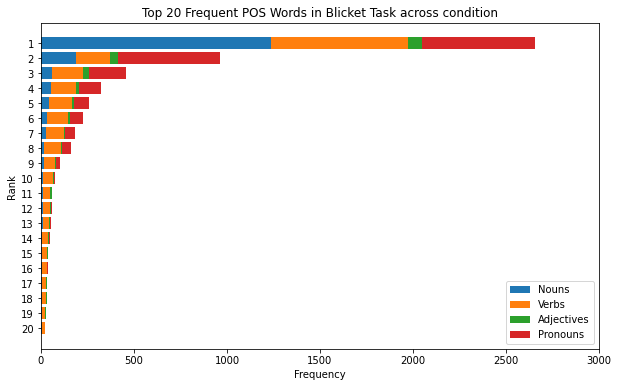

In [149]:
import matplotlib.pyplot as plt

# Prepare data for the plot
y = POS_df['rank']
x_noun = POS_df['Blicket_noun_freq']
x_verb = POS_df['Blicket_verb_freq']
x_adj = POS_df['Blicket_adj_freq']
x_pronoun = POS_df['Blicket_pronoun_freq']

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y, x_noun, label='Nouns')
ax.barh(y, x_verb, left=x_noun, label='Verbs')
ax.barh(y, x_adj, left=x_noun + x_verb, label='Adjectives')
ax.barh(y, x_pronoun, left=x_noun + x_verb + x_adj, label='Pronouns')

# Set title and labels
ax.set_title('Top 20 Frequent POS Words in Blicket Task across condition')
ax.set_xlabel('Frequency')
ax.set_ylabel('Rank')

# Invert y-axis to make it descending
ax.set_yticks(range(1, 21))
ax.set_ylim(ax.get_ylim()[::-1])

# Set x-axis limits and ticks
ax.set_xlim(0, 3000)
ax.set_xticks(range(0, 3001, 500))

# Add legend
ax.legend()

# Show the plot
plt.show()


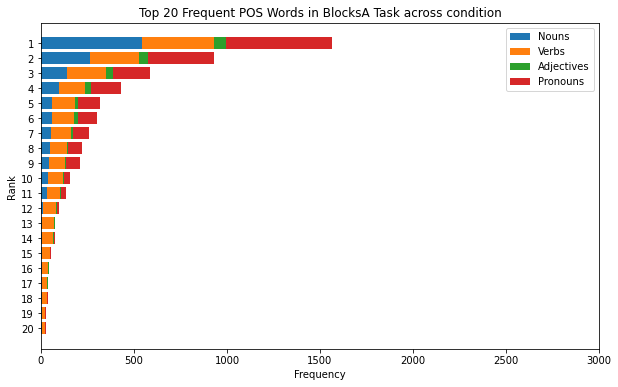

In [150]:
# Prepare data for the plot
y = POS_df['rank']
x_noun = POS_df['BlocksA_noun_freq']
x_verb = POS_df['BlocksA_verb_freq']
x_adj = POS_df['BlocksA_adj_freq']
x_pronoun = POS_df['BlocksA_pronoun_freq']

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y, x_noun, label='Nouns')
ax.barh(y, x_verb, left=x_noun, label='Verbs')
ax.barh(y, x_adj, left=x_noun + x_verb, label='Adjectives')
ax.barh(y, x_pronoun, left=x_noun + x_verb + x_adj, label='Pronouns')

# Set title and labels
ax.set_title('Top 20 Frequent POS Words in BlocksA Task across condition')
ax.set_xlabel('Frequency')
ax.set_ylabel('Rank')

# Invert y-axis to make it descending
ax.set_yticks(range(1, 21))
ax.set_ylim(ax.get_ylim()[::-1])

# Set x-axis limits and ticks
ax.set_xlim(0, 3000)
ax.set_xticks(range(0, 3001, 500))

# Add legend
ax.legend()

# Show the plot
plt.show()

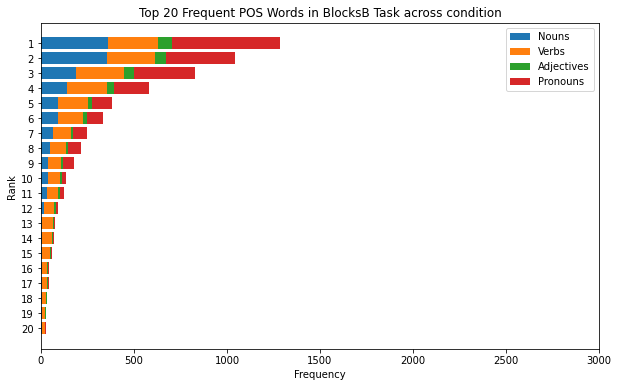

In [151]:
# Prepare data for the plot
y = POS_df['rank']
x_noun = POS_df['BlocksB_noun_freq']
x_verb = POS_df['BlocksB_verb_freq']
x_adj = POS_df['BlocksB_adj_freq']
x_pronoun = POS_df['BlocksB_pronoun_freq']

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(y, x_noun, label='Nouns')
ax.barh(y, x_verb, left=x_noun, label='Verbs')
ax.barh(y, x_adj, left=x_noun + x_verb, label='Adjectives')
ax.barh(y, x_pronoun, left=x_noun + x_verb + x_adj, label='Pronouns')

# Set title and labels
ax.set_title('Top 20 Frequent POS Words in BlocksB Task across condition')
ax.set_xlabel('Frequency')
ax.set_ylabel('Rank')

# Invert y-axis to make it descending
ax.set_yticks(range(1, 21))
ax.set_ylim(ax.get_ylim()[::-1])

# Set x-axis limits and ticks
ax.set_xlim(0, 3000)
ax.set_xticks(range(0, 3001, 500))

# Add legend
ax.legend()

# Show the plot
plt.show()

## top 20 words in different POS in different tasks and conditions

- BlocksA_CV, BlocksA_DG
- BlocksB_CV, BlocksB_DG
- Blicket_CV, Blicket_DG

In [29]:
# 1. Define a function to find the top 20 words and their frequencies for a specific task and POS
def top_20_words(df, task_name, pos_column):
    task_df = df[df['Task_name'].str.contains(task_name)]
    all_words = []
    
    for words in task_df[pos_column]:
        if isinstance(words, str):
            all_words.extend(words.split())
    
    top_20 = Counter(all_words).most_common(20)
    top_20 += [('N/A', 0)] * (20 - len(top_20))  # Fill the remaining spots if there are less than 20 words
    return top_20

# 2. Create an empty dataframe with the "rank" column
POS_df_condition = pd.DataFrame({'rank': list(range(1, 21))})

# 3. Iterate through each task and POS, applying the function and then add the results to the new dataframe
tasks = ['Blicket_CV', 'Blicket_DG', 'BlocksA_CV', 'BlocksA_DG', 'BlocksB_CV', 'BlocksB_DG']
pos_columns = ['nouns_replace', 'verbs_replace', 'adjectives_replace', 'pronouns_replace']
pos_labels = ['noun', 'verb', 'adj', 'pronoun']

for task in tasks:
    if 'Blicket' in task:
        CV_totalword = Blicket_CV_totalword
        DG_totalword = Blicket_DG_totalword
    elif 'BlocksA' in task:
        CV_totalword = BlocksA_CV_totalword
        DG_totalword = BlocksA_DG_totalword
    elif 'BlocksB' in task:
        CV_totalword = BlocksB_CV_totalword
        DG_totalword = BlocksB_DG_totalword

    for pos_col, pos_label in zip(pos_columns, pos_labels):
        top_20 = top_20_words(df_filtered, task, pos_col)
        words, freqs = zip(*top_20)

        word_col_name = f"{task}_{pos_label}_word"
        freq_col_name = f"{task}_{pos_label}_freq"
        prop_col_name = f"{task}_{pos_label}_prop"

        POS_df_condition[word_col_name] = words
        POS_df_condition[freq_col_name] = freqs

        if pos_label == "noun":
            POS_df_condition[prop_col_name] = [freq/CV_totalword*100 for freq in freqs]
        elif pos_label == "verb":
            POS_df_condition[prop_col_name] = [freq/CV_totalword*100 for freq in freqs]
        elif pos_label == "adj":
            POS_df_condition[prop_col_name] = [freq/CV_totalword*100 for freq in freqs]
        elif pos_label == "pronoun":
            POS_df_condition[prop_col_name] = [freq/CV_totalword*100 for freq in freqs]


In [30]:
POS_df_condition.head(20)

,rank,Blicket_CV_noun_word,Blicket_CV_noun_freq,Blicket_CV_noun_prop,Blicket_CV_verb_word,Blicket_CV_verb_freq,Blicket_CV_verb_prop,Blicket_CV_adj_word,Blicket_CV_adj_freq,Blicket_CV_adj_prop,...,BlocksB_DG_noun_prop,BlocksB_DG_verb_word,BlocksB_DG_verb_freq,BlocksB_DG_verb_prop,BlocksB_DG_adj_word,BlocksB_DG_adj_freq,BlocksB_DG_adj_prop,BlocksB_DG_pronoun_word,BlocksB_DG_pronoun_freq,BlocksB_DG_pronoun_prop
0,1,target_object,677,14.388948,be,389,8.267800,good,21,0.446334,...,3.324444,be,148,2.631111,colour_adj,35,0.622222,you,265,4.711111
1,2,childname,47,0.998937,say,92,1.955367,colour_adj,17,0.361318,...,2.951111,build,121,2.151111,good,33,0.586667,it,142,2.524444
2,3,sweetheart,22,0.467588,look,83,1.764081,blue,12,0.255048,...,1.582222,put,104,1.848889,ready,15,0.266667,we,129,2.293333
3,4,infant_gender,16,0.340064,go,77,1.636557,funny,9,0.191286,...,1.244444,go,91,1.617778,more,6,0.106667,one,76,1.351111
4,5,parent,10,0.212540,move,61,1.296493,ready,9,0.191286,...,0.693333,look,87,1.546667,well-done,6,0.106667,I,58,1.031111
5,6,screen_device,9,0.191286,call,53,1.126461,purple,7,0.148778,...,0.586667,touch,49,0.871111,tall,5,0.088889,this,28,0.497778
6,7,spot,9,0.191286,touch,42,0.892667,well-done,6,0.127524,...,0.551111,do,41,0.728889,an,4,0.071111,that,23,0.408889
7,8,turn,8,0.170032,do,38,0.807651,little,5,0.106270,...,0.337778,see,40,0.711111,big,4,0.071111,they,19,0.337778
8,9,finger,8,0.170032,get,28,0.595112,right,5,0.106270,...,0.320000,want,37,0.657778,neat,2,0.035556,all,9,0.160000
9,10,thing,7,0.148778,see,27,0.573858,hot,5,0.106270,...,0.284444,fall,34,0.604444,nice,2,0.035556,there,8,0.142222


In [31]:
# Save the POS_df dataframe to a CSV file
output_path_POS_task_condition = "D:/UoA/04research/01PhD_projects/03_POS/output/POS_rank_task_condition_2.csv"
POS_df_condition.to_csv(output_path_POS_task_condition, index=False)